#NOTA
Este código se puede correr en jupyter para poder tener las gráficas en modo interactivo, unicamente se corre la siguiente linea

```%matplotlib notebook```

Y para poder ver la gráfica de error se tiene que "apagar" la gráfica interactiva (hacinedo click en el boton de encendido en la perte superior derecha de la gráfica) y posteriormente correr la celda que reproduce la gráfica del error

In [ ]:
#cargamos el archivo con los datos
from google.colab import files
files.upload()

Saving xyz.txt to xyz.txt


{'xyz.txt': b'-94.61\t15.14\t23\n-94.4\t15.2\t16\n-94.66\t15.37\t18\n-94.29\t14.94\t16\n-94.34\t15.1\t19\n-95.16\t15.79\t14\n-94.43\t15.16\t40\n-95.09\t15.83\t13\n-94.3\t15.04\t24\n-94.31\t14.86\t15\n-94.69\t15.3\t16\n-95.18\t15.95\t72\n-94.72\t15.38\t16\n-94.72\t15.38\t16\n-94.61\t15.22\t16\n-94.34\t14.94\t15\n-94.34\t14.94\t15\n-95.16\t16.07\t21\n-94.76\t15.4\t14\n-94.27\t14.93\t16\n-94.8\t15.33\t16\n-94.76\t15.37\t30\n-94.84\t15.35\t16\n-95.25\t15.69\t12\n-94.81\t15.56\t16\n-94.32\t15.07\t15\n-94.45\t15.15\t34\n-94.45\t15.15\t34\n-94.19\t15.37\t31\n-94.37\t15\t10\n-95.26\t16.09\t45\n-94.14\t14.7\t8\n-94.69\t15.5\t16\n-94.67\t15.45\t16\n-94.72\t15.44\t16\n-94.72\t15.44\t16\n-94.21\t15.2\t16\n-94.4\t15.1\t16\n-94.72\t15.36\t25\n-94.72\t15.36\t25\n-94.72\t15.36\t25\n-94.28\t14.61\t16\n-94.96\t15.93\t62\n-94.18\t14.95\t36\n-94.64\t15.26\t16\n-94.55\t15.14\t24\n-95.19\t15.78\t20\n-94.82\t15.48\t16\n-94.82\t15.48\t16\n-94.54\t15.22\t17\n-95.25\t15.66\t12\n-94.87\t15.54\t17\n-94.11\t14.95\

In [ ]:
#Bibliotecas
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import pandas as pd

#Cargando los datos


In [ ]:
#leemos el archivo
df = pd.read_table('xyz.txt', names = ['x', 'y', 'z'])

#cargamos las obseravaciones de los tres ejes
x_obs = np.array(df['x'])
y_obs = np.array(df['y'])
#multiplicamos las alturas por -1
z_obs = -1*np.array(df['z'])

#Norma L1 definida en clase
def L1(actual_value,predicted_value):
    l1 = np.sum(np.abs((actual_value-predicted_value)))
    return l1
  

#creamos la funcion del plano
def plano(a, b, c, x, y):
    return a*x + b*y + c


#Modelo inicial


[-44.827586206896555, -51.724137931034484, -3469.3877551020405]


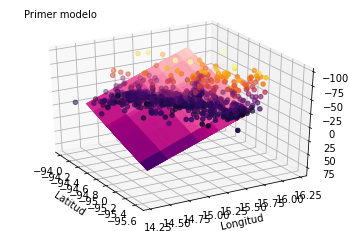

In [ ]:
#Rango por el cual se va a hacer el gridsearch
avals=np.linspace(-100, 100,30)
bvals=np.linspace(-100, 100,30)
cvals=np.linspace(-10000, 10000,50)

#lista que va a almacenar los parametros
params=[]
error=[]

#realizamos el gridsearch
for ii in range(len(avals)):
    for jj in range(len(bvals)):
        for ti in range(len(cvals)):
            #calculamos la prediccion de z
            z_pre=plano(avals[ii],bvals[jj],cvals[ti], x_obs, y_obs)
            #obtenemos el valor y lo anexamos a la lista
            error.append(L1(z_obs,z_pre))
            #guardamos los parametros que producen ese error
            params.append([avals[ii],bvals[jj],cvals[ti]])

#buscamos los parametros que producen el error minimo         
L1N=np.asarray(error)/np.max(np.abs(np.asarray(error)))
idx1=np.where(np.min(L1N)==L1N)[0]


#utilizamos mesgrid para poder plotear el plano
X, Y = np.meshgrid(x_obs, y_obs)
modelo = plano(params[idx1[0]][0],params[idx1[0]][1], params[idx1[0]][2], X, Y)


#graficamos las observaciones y el modelo
ax = plt.axes(projection = '3d')
ax.scatter3D(x_obs, y_obs, z_obs, c = -z_obs, cmap='inferno')
ax.plot_surface(X, Y, modelo, cmap='RdPu')
ax.text2D(0.05, 0.95, "Primer modelo", transform=ax.transAxes)
ax.set_ylabel("Longitud ")
ax.set_xlabel("Latitud")
ax.set_zlabel("Profundidad")
ax.view_init(-150, 30)
print(params[idx1[0]])

No handles with labels found to put in legend.


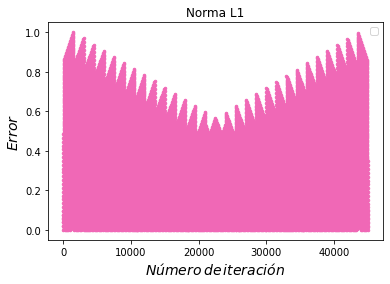

In [ ]:
plt.plot(np.asarray(error)/np.max(np.abs(np.asarray(error))),'bo',ms=2.5, color = '#F068B6')
plt.legend()
plt.title("Norma L1")
plt.ylabel(r'$Error$',fontsize=14)
plt.xlabel(r'$Número\, de\, iteración$', fontsize=14)
plt.savefig("error1")
plt.show()

#Modelo final

[-43.0, -40.89655172413793, -3462.8571428571427]


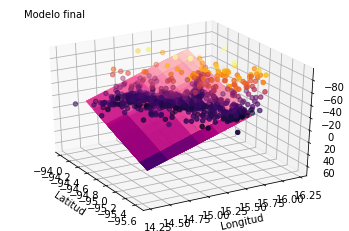

In [ ]:
#Rango por el cual se va a hacer el gridsearch
avals=np.linspace(-43, -45,30)
bvals=np.linspace(-42, -38,30)
cvals=np.linspace(-3470, -3460,50)

#lista que va a almacenar los parametros
params=[]
error=[]

#realizamos el gridsearch
for ii in range(len(avals)):
    for jj in range(len(bvals)):
        for ti in range(len(cvals)):
            #calculamos la prediccion de z
            z_pre=plano(avals[ii],bvals[jj],cvals[ti], x_obs, y_obs)
            #obtenemos el valor y lo anexamos a la lista
            error.append(L1(z_obs,z_pre))
            #guardamos los parametros que producen ese error
            params.append([avals[ii],bvals[jj],cvals[ti]])

#buscamos los parametros que producen el error minimo         
L1N=np.asarray(error)/np.max(np.abs(np.asarray(error)))
idx1=np.where(np.min(L1N)==L1N)[0]


#utilizamos mesgrid para poder plotear el plano
X, Y = np.meshgrid(x_obs, y_obs)
modelo = plano(params[idx1[0]][0],params[idx1[0]][1], params[idx1[0]][2], X, Y)


#graficamos las observaciones y el modelo
ax = plt.axes(projection = '3d')
ax.scatter3D(x_obs, y_obs, z_obs, c = -z_obs, cmap='inferno')
ax.plot_surface(X, Y, modelo, cmap='RdPu')
ax.text2D(0.05, 0.95, "Modelo final", transform=ax.transAxes)
ax.set_ylabel("Longitud ")
ax.set_xlabel("Latitud")
ax.set_zlabel("Profundidad")
ax.view_init(-150, 30)
print(params[idx1[0]])

No handles with labels found to put in legend.


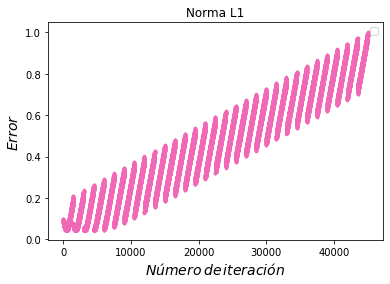

In [ ]:
plt.plot(np.asarray(error)/np.max(np.abs(np.asarray(error))),'bo',ms=2.5, color = '#F068B6')
plt.legend()
plt.title("Norma L1")
plt.ylabel(r'$Error$',fontsize=14)
plt.xlabel(r'$Número\, de\, iteración$', fontsize=14)
plt.savefig("error2")
plt.show()